In [1]:
import pickle
import glob
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

d:\net work\documents\dheeraj v\assessment 2\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\net work\documents\dheeraj v\assessment 2\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\net work\documents\dheeraj v\assessment 2\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\net work\documents\dheera

In [2]:
# To run on GPU
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
# Fetch all the files from the image folder
files = glob.glob('images/**')
print(files)
dictval={}
i = 0

# Iterate over every file and try to save data to the dictval
for file in files:
    print(file)
    if "batches.meta" in file:
        # batches.meta contains the data for the label names 
        # and size of the batch
        with open(file,'rb') as fo:
            data = pickle.load(fo, encoding='bytes')
            print(data)
    else:
        with open(file, 'rb') as fo:
            temp = pickle.load(fo, encoding='bytes')
            #print(temp)
            if i == 0:
                dictval['data']= list(temp[b'data'])
                dictval['labels']= list(temp[b'labels'])
            else:
                dictval['data'] = dictval['data'] + list(temp[b'data'])
                dictval['labels'] = dictval['labels'] + list(temp[b'labels'])
            i+=1


['images\\batches.meta', 'images\\data_batch_1', 'images\\data_batch_2', 'images\\data_batch_3', 'images\\data_batch_4', 'images\\data_batch_5']
images\batches.meta
{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}
images\data_batch_1
images\data_batch_2
images\data_batch_3
images\data_batch_4
images\data_batch_5


In [4]:
# Convert the bytes to the normal string
print(data[b'label_names'])
labels = [x.decode('utf-8') for x in data[b'label_names']] 
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
alldata = dictval['data']
alldatalabels = dictval['labels']
trainingdata = []
def create_training_data():
    def reshapedata(imdata, imlabel):
        print(len(imdata))
#         fig=plt.figure(figsize=(8, 8))
        for i  in range(len(imdata)):
#         for i  in range(1,5):
            # This data is the in the format of 3072 array elements
            temp = imdata[i]
            #print(temp)
            #print(len(temp))
            
            # To reshape the data
            img = np.reshape(temp, (3, 32,32)).T
            #print(img.shape)
            
            # Convert the numpy array into the RGB format
            img = Image.fromarray(img, 'RGB')
            
            # To see the image without correct orientation
            #plt.imshow(img)
            #plt.show()
            
            # img is in rotated format, so we need to rotate the image
            # to get the original orientation
            img = img.rotate(270)
            
            # Here gray conversion is done: in our application color images are not need because we 
            # can get the same information in the gray image. 
            # Benefit of using gray image : It will reduce the calculations by 3(RGB have 3 channels)
            img  = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
            img  = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
            
            # Just to make sure that every image is 32*32
#             img = cv2.resize(img, (32,32))
            
            # To see the image in the correct orientation
#             fig.add_subplot(5, 5, i)
#             plt.imshow(img)

            
            
            # Just to verify that every label is int
            if type(imlabel[i]) != type(2):
                continue
            class_num = imlabel[i]
#             plt.title(labels[class_num])
                      
#             print(labels[class_num])
#             break
            # To create training data: 
            # I have appened the image data and the label
            # temp[0]: This is image
            # temp[1]: This is label
            temp  = [img, class_num]
            trainingdata.append(temp)
            #break
    reshapedata(alldata, alldatalabels)
create_training_data()
print("This is the dimension of the data")
print(len(trainingdata))



50000
This is the dimension of the data
50000


In [6]:
# This is to make the data shuffled randomly
import random
random.shuffle(trainingdata)

In [7]:
# This is just to check whether every data is 
# append correctly or not.
for sample in trainingdata[:10]:
    print("label = %d" %sample[1])

X = []
Y = []
# This is to store all the images in X
# and all the labels in Y
for features, label in trainingdata:
    X.append(features)
    Y.append(label)
# To reshape informat of tensorflow
X = np.array(X).reshape(-1,32, 32, 3)
print(X.shape)
# plt.imshow(X[4,:,:,:])
# plt.show()


label = 9
label = 9
label = 8
label = 0
label = 8
label = 3
label = 0
label = 0
label = 1
label = 7
(50000, 32, 32, 3)


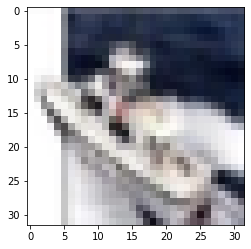

In [8]:
#X = pickle.load(open("X.pickle", 'rb'))
#Y = pickle.load(open("Y.pickle", 'rb'))

# to normalize the data. 
X = X.astype('float32')
X /= 255.0
plt.imshow(X[4,:,:,:])
plt.show()
# print(X[8,:,:,:])

# 60% Training data
x_train = X[:30000]
y_train = Y[:30000]

# 20% Testing data
x_test = X[30000:40000]
y_test = Y[30000:40000]

# 20% Validation data
x_val = X[40000:50000]
y_val = Y[40000:50000]


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
# model.add(Dropout(0.2))

# # model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))

# # model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))

# # model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Flatten())
# # model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# model.summary()

In [16]:
# Model compilation is done
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Here we are going to train the model
model.fit(x_train, y_train,batch_size=200, validation_data=(x_val, y_val), epochs = 100)
 

Train on 30000 samples, validate on 10000 samples
Epoch 1/100
30000/30000 [==============================] - 29s 974us/sample - loss: 2.0916 - acc: 0.2151 - val_loss: 1.8485 - val_acc: 0.3137
Epoch 2/100
30000/30000 [==============================] - 28s 931us/sample - loss: 1.7096 - acc: 0.3618 - val_loss: 1.5696 - val_acc: 0.4294
Epoch 3/100
30000/30000 [==============================] - 28s 933us/sample - loss: 1.4892 - acc: 0.4461 - val_loss: 1.4033 - val_acc: 0.4896
Epoch 4/100
30000/30000 [==============================] - 28s 933us/sample - loss: 1.3561 - acc: 0.5029 - val_loss: 1.3014 - val_acc: 0.5272
Epoch 5/100
30000/30000 [==============================] - 28s 932us/sample - loss: 1.2672 - acc: 0.5389 - val_loss: 1.2380 - val_acc: 0.5582
Epoch 6/100
30000/30000 [==============================] - 28s 932us/sample - loss: 1.1918 - acc: 0.5689 - val_loss: 1.1679 - val_acc: 0.5812
Epoch 7/100
30000/30000 [==============================] - 28s 934us/sample - loss: 1.1318 - acc: 

KeyboardInterrupt: 

In [ ]:
# To find the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
print(test_acc)

In [ ]:
model.save('ourmodel.h5')
saved_model = tf.keras.models.load_model('ourmodel.h5')

In [ ]:
y_pred = saved_model.predict(x_test)

In [ ]:
print(y_pred[8])

In [ ]:
predval = 105
count = 0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == y_test[i]:
        count +=1
accuracy = count/len(y_pred)
print(accuracy)
# print(np.argmax(y_pred[predval]))
# print(y_test[predval])